In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [7]:
data = pd.read_csv('Hotel_Booking_Dataset.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224.0,2017.0,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5.0,2018.0,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1.0,2018.0,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,2018.0,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48.0,2018.0,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
data.shape

(36275, 19)

In [9]:
data.isnull().sum()

Booking_ID                                0
no_of_adults                              0
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                       177
required_car_parking_space                0
room_type_reserved                      274
lead_time                                 1
arrival_year                             62
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                        0
no_of_special_requests                    0
booking_status                            0
dtype: int64

As compared to number os instances, very less values are missing so we drop missing value instances

In [10]:
data.dropna(inplace=True)

In [11]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224.0,2017.0,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5.0,2018.0,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1.0,2018.0,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,2018.0,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48.0,2018.0,4,11,Online,0,0,0,94.50,0,Canceled


Id is unique for every row so it is not help in predictive analysis (or finding pattern between data), so drop Booking-ID

In [12]:
data.drop(columns=['Booking_ID'], inplace=True)

In [13]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224.0,2017.0,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5.0,2018.0,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1.0,2018.0,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,2018.0,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48.0,2018.0,4,11,Online,0,0,0,94.50,0,Canceled


## Exploratory Analysis Phase - 1

In [14]:
data['no_of_adults'].value_counts()
# This feature shows total number of adults present in booking (maximum times 1 or 2)

2    25755
1     7648
3     2276
0      104
4       16
Name: no_of_adults, dtype: int64

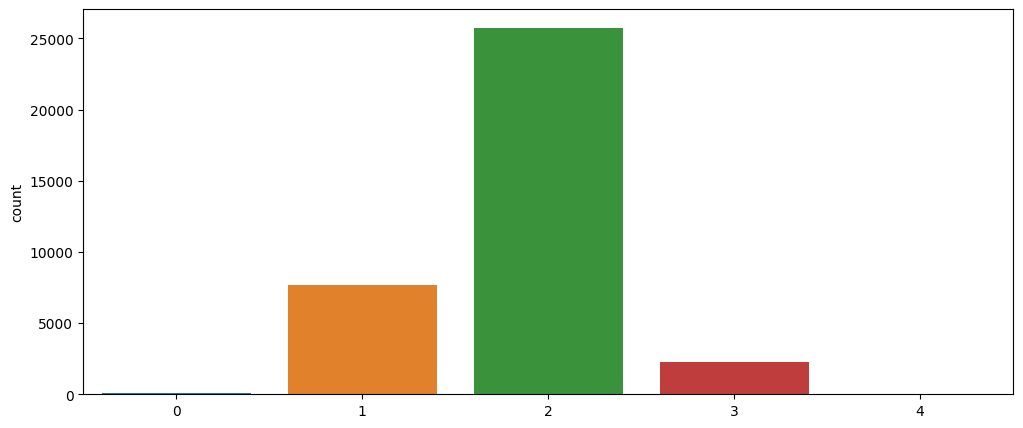

In [15]:
plt.rcParams['figure.figsize']=(12,5)
sns.countplot(x = data['no_of_adults'].values)
plt.show()

In [16]:
data['no_of_children'].value_counts()

0     33178
1      1598
2      1002
3        18
9         2
10        1
Name: no_of_children, dtype: int64

In [17]:
data['no_of_weekend_nights'].value_counts()

0    16665
1     9853
2     8949
3      151
4      127
5       33
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [18]:
data['no_of_week_nights'].value_counts()

2     11295
1      9374
3      7715
4      2947
0      2375
5      1586
6       188
7       113
8        62
10       59
9        33
11       17
15       10
12        8
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

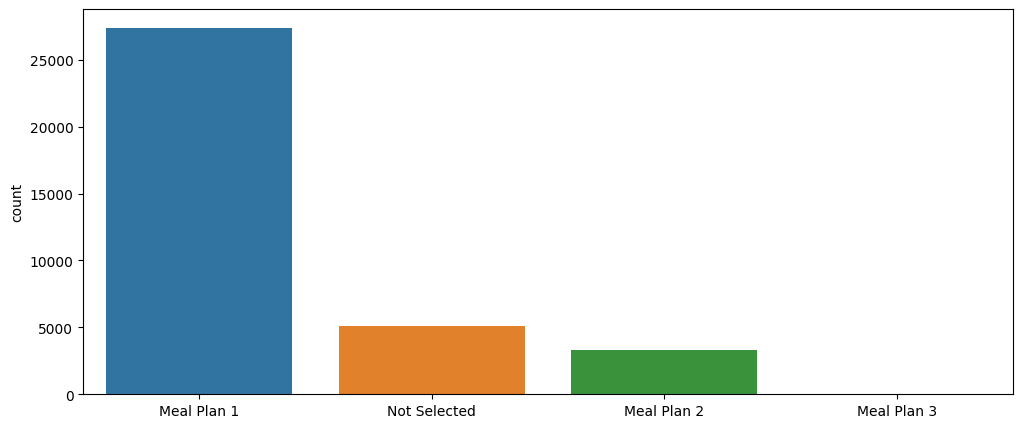

In [19]:
plt.rcParams['figure.figsize']=(12,5)
sns.countplot(x = data['type_of_meal_plan'].values)
plt.show()

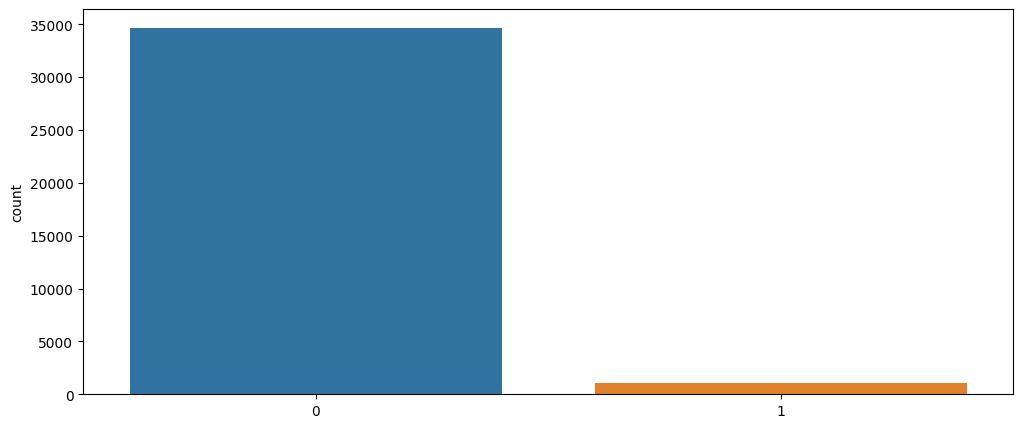

In [20]:
plt.rcParams['figure.figsize']=(12,5)
sns.countplot(x = data['required_car_parking_space'].values)
plt.show()

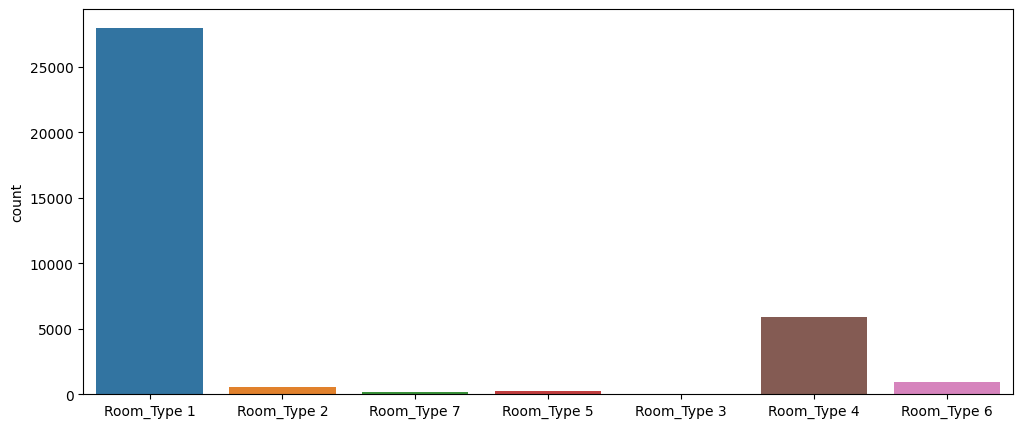

In [21]:
plt.rcParams['figure.figsize']=(12,5)
sns.countplot(x = data['room_type_reserved'].values)
plt.show()

<ipython-input-22-56e72ec68d81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(data['lead_time']))


<Axes: xlabel='lead_time', ylabel='Density'>

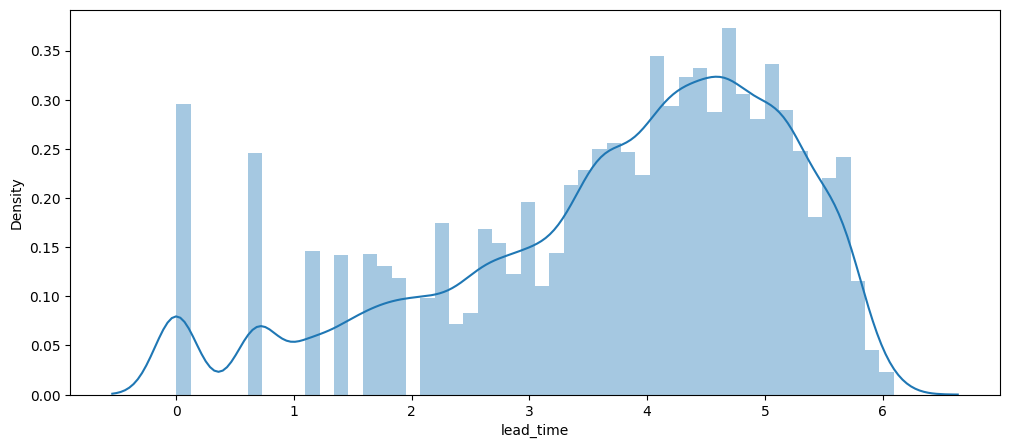

In [22]:
sns.distplot(np.log1p(data['lead_time']))

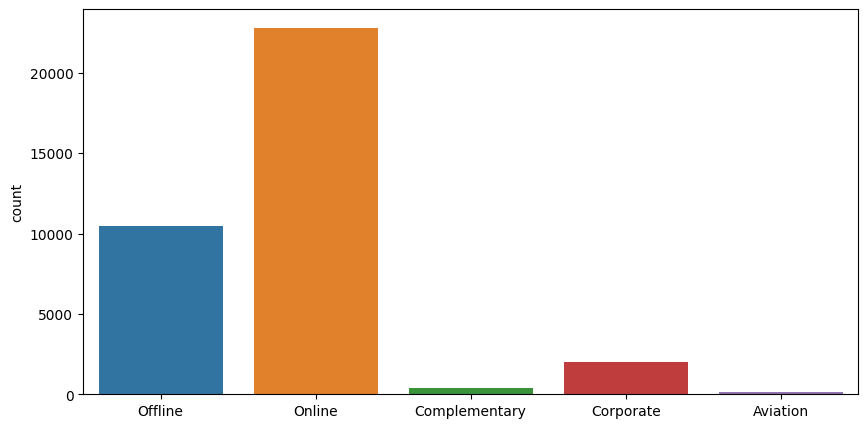

In [23]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x = data['market_segment_type'].values)
plt.show()

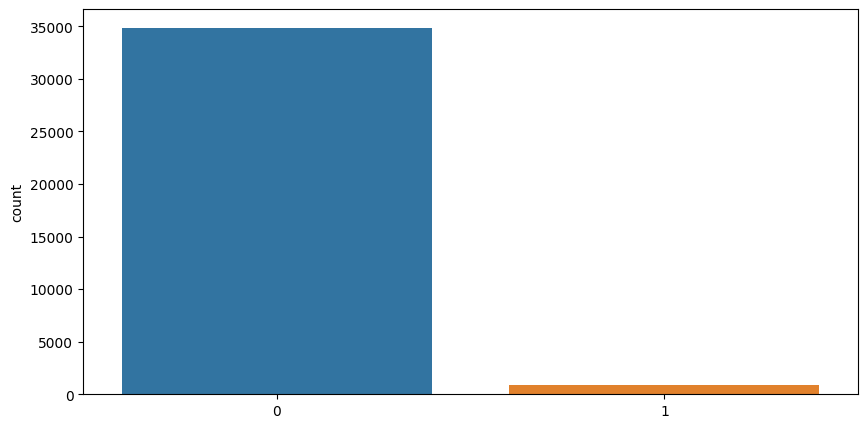

In [24]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x = data['repeated_guest'].values)
plt.show()

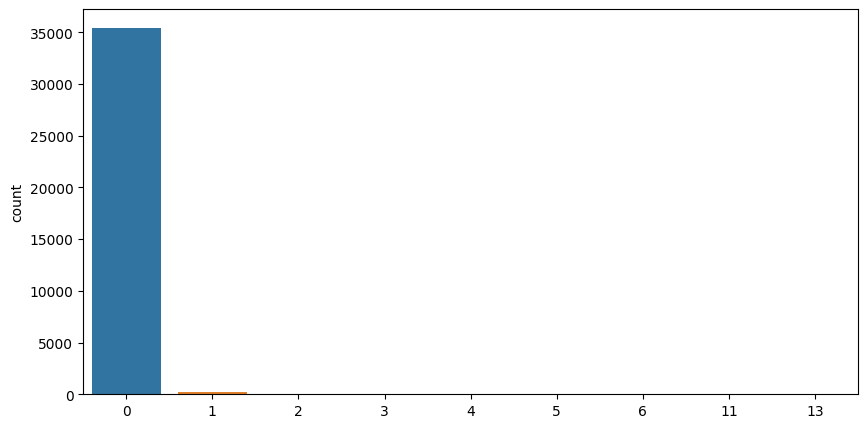

In [25]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x = data['no_of_previous_cancellations'].values)
plt.show()

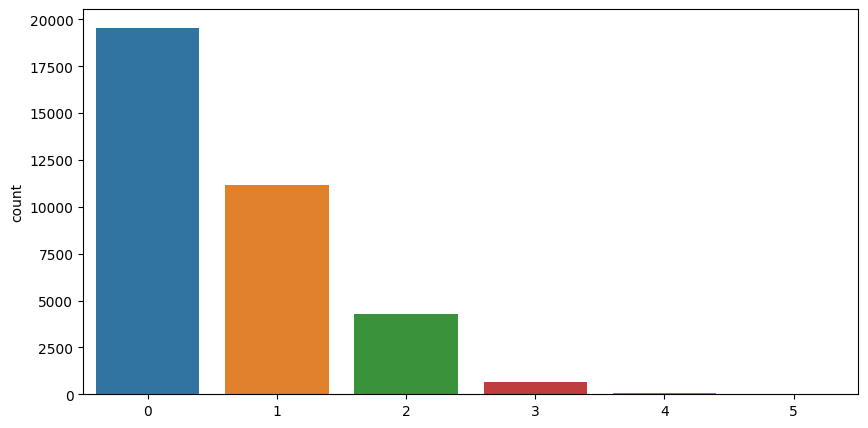

In [26]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x = data['no_of_special_requests'].values)
plt.show()

<ipython-input-27-66b4c7056c4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['avg_price_per_room'].values)


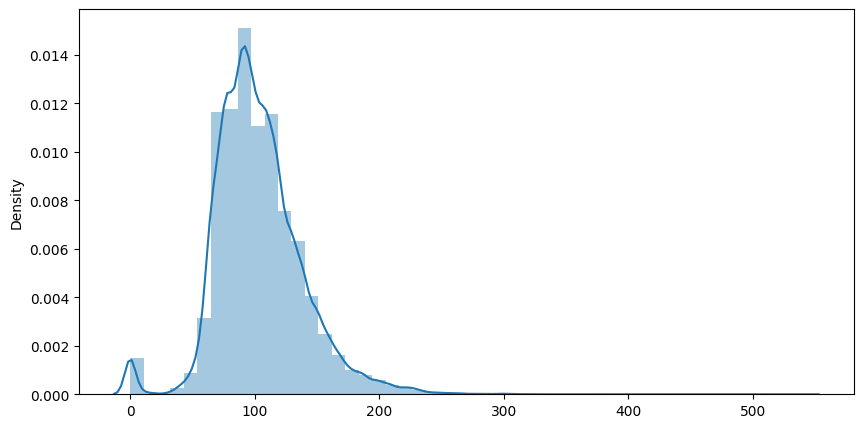

In [27]:
sns.distplot(data['avg_price_per_room'].values)
plt.show()

## Data Preprocessing Phase - 2

In [28]:
data.select_dtypes('float64').columns

Index(['lead_time', 'arrival_year', 'avg_price_per_room'], dtype='object')

In [29]:
scaler = StandardScaler()
data[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(data[['lead_time', 'avg_price_per_room']].values)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,1.616246,2017.0,10,2,Offline,0,0,0,-1.094442,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,-0.932198,2018.0,11,6,Online,0,0,0,0.093822,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,-0.978745,2018.0,2,28,Online,0,0,0,-1.236988,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,1.464968,2018.0,5,20,Online,0,0,0,-0.096619,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,-0.431819,2018.0,4,11,Online,0,0,0,-0.253420,0,Canceled


Label Encode the Qualitative Features

In [30]:
data.select_dtypes('object').columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [31]:
data['type_of_meal_plan'] = LabelEncoder().fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = LabelEncoder().fit_transform(data['room_type_reserved'])
data['market_segment_type'] = LabelEncoder().fit_transform(data['market_segment_type'])
data['booking_status'] = LabelEncoder().fit_transform(data['booking_status'])
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,1.616246,2017.0,10,2,3,0,0,0,-1.094442,0,1
1,2,0,2,3,3,0,0,-0.932198,2018.0,11,6,4,0,0,0,0.093822,1,1
2,1,0,2,1,0,0,0,-0.978745,2018.0,2,28,4,0,0,0,-1.236988,0,0
3,2,0,0,2,0,0,0,1.464968,2018.0,5,20,4,0,0,0,-0.096619,0,0
4,2,0,1,1,3,0,0,-0.431819,2018.0,4,11,4,0,0,0,-0.253420,0,0


In [32]:
data = data.astype('float32')

In [33]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,1.616246,2017.0,10.0,2.0,3.0,0.0,0.0,0.0,-1.094442,0.0,1.0
1,2.0,0.0,2.0,3.0,3.0,0.0,0.0,-0.932198,2018.0,11.0,6.0,4.0,0.0,0.0,0.0,0.093823,1.0,1.0
2,1.0,0.0,2.0,1.0,0.0,0.0,0.0,-0.978745,2018.0,2.0,28.0,4.0,0.0,0.0,0.0,-1.236988,0.0,0.0
3,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.464968,2018.0,5.0,20.0,4.0,0.0,0.0,0.0,-0.096619,0.0,0.0
4,2.0,0.0,1.0,1.0,3.0,0.0,0.0,-0.431819,2018.0,4.0,11.0,4.0,0.0,0.0,0.0,-0.253420,0.0,0.0


In [34]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

## Feature Selection Techniques

In [35]:
X = data.drop(columns = ['booking_status']).values
Y = data['booking_status'].values
X.shape, Y.shape

((35799, 17), (35799,))

In [36]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape, Y.shape          

((35799, 6), (35799,))

In [37]:
import pickle 
file = open('Feature_selector', 'wb')

# dump information to that file
pickle.dump(model, file)

# close the file
file.close()

In [38]:
Y

array([1., 1., 0., ..., 1., 0., 1.], dtype=float32)

## TRAIN TEST SPLIT

In [39]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train , y_test = train_test_split(X,Y, test_size=0.2)

In [40]:
import numpy as np

print(np.shape(x_train))

(28639, 17)


In [41]:
import numpy as np

print(np.shape(y_train))

(28639,)


## Multi Layer Perceptrons


**Without feature selection**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(17,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision(), keras.metrics.AUC()])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/10
716/716 [==============================] - 4s 4ms/step - loss: 24.7928 - accuracy: 0.5699 - recall: 0.6933 - precision: 0.6754 - auc: 0.5049 - val_loss: 0.6608 - val_accuracy: 0.6781 - val_recall: 1.0000 - val_precision: 0.6781 - val_auc: 0.5047
Epoch 2/10
716/716 [==============================] - 3s 4ms/step - loss: 1.0651 - accuracy: 0.6399 - recall: 0.9054 - precision: 0.6723 - auc: 0.5026 - val_loss: 0.6485 - val_accuracy: 0.6781 - val_recall: 1.0000 - val_precision: 0.6781 - val_auc: 0.5000
Epoch 3/10
716/716 [==============================] - 3s 4ms/step - loss: 0.7319 - accuracy: 0.6565 - recall: 0.9580 - precision: 0.6713 - auc: 0.4987 - val_loss: 0.6367 - val_accuracy: 0.6781 - val_recall: 1.0000 - val_precision: 0.6781 - val_auc: 0.5000
Epoch 4/10
716/716 [==============================] - 2s 3ms/step - loss: 0.6767 - accuracy: 0.6651 - recall: 0.9773 - precision: 0.6726 - auc: 0.4976 - val_loss: 0.6323 - val_accuracy: 0.6781 - val_recall: 1.0000 - val_precision: 

In [ ]:

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

224/224 [==============================] - 1s 2ms/step - loss: 0.6344 - accuracy: 0.6697 - recall: 1.0000 - precision: 0.6697 - auc: 0.5000
Test loss: 0.6344009041786194
Test accuracy: 0.6696927547454834


In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

224/224 [==============================] - 0s 1ms/step
[[   0 2365]
 [   0 4795]]


**With feature selection**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(6,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',])
# Train the model
history = model.fit(x_tran_new, y_train_new,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/10
716/716 [==============================] - 5s 5ms/step - loss: 0.6417 - accuracy: 0.6809 - recall_1: 0.8574 - precision_1: 0.7213 - auc_1: 0.6524 - val_loss: 0.5117 - val_accuracy: 0.7727 - val_recall_1: 0.9094 - val_precision_1: 0.7821 - val_auc_1: 0.8192
Epoch 2/10
716/716 [==============================] - 2s 3ms/step - loss: 0.5059 - accuracy: 0.7625 - recall_1: 0.8992 - precision_1: 0.7812 - auc_1: 0.7932 - val_loss: 0.4857 - val_accuracy: 0.7744 - val_recall_1: 0.8708 - val_precision_1: 0.8041 - val_auc_1: 0.8282
Epoch 3/10
716/716 [==============================] - 2s 3ms/step - loss: 0.4906 - accuracy: 0.7723 - recall_1: 0.8972 - precision_1: 0.7923 - auc_1: 0.8091 - val_loss: 0.4778 - val_accuracy: 0.7774 - val_recall_1: 0.9231 - val_precision_1: 0.7803 - val_auc_1: 0.8300
Epoch 4/10
716/716 [==============================] - 2s 3ms/step - loss: 0.4839 - accuracy: 0.7767 - recall_1: 0.8973 - precision_1: 0.7968 - auc_1: 0.8147 - val_loss: 0.4729 - val_accuracy: 0.77

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes for the test set
y_pred = model.predict(x_test_new)
y_pred_classes = np.round(y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

print('Confusion Matrix:')
print(cm)

224/224 [==============================] - 0s 1ms/step
Confusion Matrix:
[[ 629 1736]
 [1254 3541]]


In [50]:
from sklearn.model_selection import train_test_split
x_tran_new ,x_test_new, y_train_new , y_test_new = train_test_split(X_new,Y, test_size=0.2)

In [51]:
x_tran_new.shape

(28639, 6)

## LSTM

**Without feature selection**

In [44]:
import tensorflow as tf
from tensorflow.keras import layers

# Define input shape
input_shape = (17, 1)

# Create a sequential model
model = tf.keras.models.Sequential()

# Add LSTM layer with 64 units
model.add(layers.LSTM(units=64, input_shape=input_shape))

# Add a dense layer with 128 units
model.add(layers.Dense(units=128, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function
model.add(layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision(), keras.metrics.AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train.reshape((x_train.shape[0], x_train.shape[1], 1)), y_train, epochs=10, batch_size=128, validation_data=(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)), y_test))




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,345
Trainable params: 25,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
224/224 [==============================] - 5s 10ms/step - loss: 0.5678 - accuracy: 0.7113 - recall: 0.9372 - precision: 0.7191 - auc: 0.7091 - val_loss: 0.4935 - val_accuracy: 0.7701 - val_recall: 0.8476 - val_precision: 0.8163 - val_auc: 0.8128
Epoch 2/10
224/224 [==============================] - 2s 

In [43]:
# Predict on test data
y_pred = model.predict(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)))

# Evaluate the model
score = model.evaluate(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)), y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

224/224 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8208
Test loss: 0.40608102083206177
Test accuracy: 0.820810079574585


In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get predicted probabilities for the test data
y_pred_prob = model.predict(x_test)

# Get predicted class labels
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


224/224 [==============================] - 0s 2ms/step
[[1592  771]
 [ 476 4321]]


**With feature selection**

In [52]:
x_tran_new = x_tran_new.reshape(x_tran_new.shape[0], x_tran_new.shape[1], 1)


In [53]:
import tensorflow as tf

# Define input shape
input_shape = (6, 1)

# Create a sequential model
model = tf.keras.models.Sequential()

# Add an LSTM layer with 64 units
model.add(tf.keras.layers.LSTM(units=64, input_shape=input_shape))

# Add a dense layer with 128 units
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), keras.metrics.AUC()])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,345
Trainable params: 25,345
Non-trainable params: 0
_________________________________________________________________


In [57]:
hist= model.fit(x_tran_new, y_train_new , epochs = 10, batch_size = 128, validation_data=(x_test_new, y_test_new))

Epoch 1/10
224/224 [==============================] - 2s 7ms/step - loss: 0.4271 - accuracy: 0.7995 - recall_1: 0.9003 - precision_1: 0.8194 - auc_1: 0.8531 - val_loss: 0.4206 - val_accuracy: 0.8021 - val_recall_1: 0.9078 - val_precision_1: 0.8184 - val_auc_1: 0.8579
Epoch 2/10
224/224 [==============================] - 2s 8ms/step - loss: 0.4245 - accuracy: 0.8009 - recall_1: 0.9015 - precision_1: 0.8201 - auc_1: 0.8549 - val_loss: 0.4181 - val_accuracy: 0.8028 - val_recall_1: 0.9034 - val_precision_1: 0.8216 - val_auc_1: 0.8608
Epoch 3/10
224/224 [==============================] - 2s 9ms/step - loss: 0.4217 - accuracy: 0.8024 - recall_1: 0.9025 - precision_1: 0.8212 - auc_1: 0.8565 - val_loss: 0.4179 - val_accuracy: 0.8028 - val_recall_1: 0.8957 - val_precision_1: 0.8262 - val_auc_1: 0.8611
Epoch 4/10
224/224 [==============================] - 2s 8ms/step - loss: 0.4209 - accuracy: 0.8035 - recall_1: 0.9030 - precision_1: 0.8222 - auc_1: 0.8571 - val_loss: 0.4132 - val_accuracy: 0.80

In [58]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate predicted values for the test set
y_pred = model.predict(x_test_new)

# Convert predicted probabilities to binary predictions
y_pred_binary = np.round(y_pred)

# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test_new, y_pred_binary)

print(confusion_matrix)

224/224 [==============================] - 0s 2ms/step
[[1340  996]
 [ 309 4515]]
